In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.8 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import matplotlib.pyplot as plt

# inicio circuito cuántico
qc1 = QuantumCircuit(4, 4)

# Puertas de Hadamard
qc1.h(3)
qc1.h(1)
qc1.h(0)
qc1.h(2)


In [ ]:
# oraculo cuántico
qc2 = QuantumCircuit(4, 4)

# Marcando el estado a buscar
qc2.barrier()
qc2.h(3)
qc2.mcx([1, 0, 2], 3)  # Usando mcx para el control de 3 qubits
qc2.h(3)

qc2.barrier()


# Hadamard
qc2.h(3)


# Puertas X
qc2.x(2)
qc2.x(1)

# Puerta C3X (control de tres)
qc2.mcx([1, 0, 2], 3)  # Usando mcx para el control de 3 qubits

qc2.x(1)

# puertas
qc2.x(2)
qc2.h(3)


qc2.barrier()


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 3)), clbits=())

In [ ]:
# Difusor cuántico
qc3 = QuantumCircuit(4, 4)

# Puertas de Hadamard
qc3.h(0)
qc3.h(2)
qc3.h(1)
qc3.h(3)

# Puertas X
qc3.x(0)
qc3.x(2)
qc3.x(1)
qc3.x(3)

# Más puertas de Hadamard
qc3.h(3)
qc3.mcx([1, 0, 2], 3)  # Usando mcx para el control de 3 qubits
qc3.h(3)

# Barreras
qc3.barrier()
qc3.x(0)
qc3.x(2)
qc3.x(1)
qc3.x(3)

# Puertas de Hadamard
qc3.h(3)
qc3.h(0)
qc3.h(2)
qc3.h(1)


In [ ]:
# Cicuito de Medición
qc4 = QuantumCircuit(4, 4)

qc4.measure(0, 0)  # Primer qubit
qc4.measure(1, 1)  # Segundo qubit
qc4.measure(2, 2)  # Tercer qubit
qc4.measure(3, 3)  # Cuarto qubit

In [ ]:
# Union de circuitos oraculo y difusor

qcOD = qc2.compose(qc3)
print(qcOD)

      ░                 ░                 ░ ┌───┐┌───┐                ░ ┌───┐»
q_0: ─░────────■────────░────────■────────░─┤ H ├┤ X ├───────■────────░─┤ X ├»
      ░        │        ░ ┌───┐  │  ┌───┐ ░ ├───┤├───┤       │        ░ ├───┤»
q_1: ─░────────■────────░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■────────░─┤ X ├»
      ░        │        ░ ├───┤  │  ├───┤ ░ ├───┤├───┤       │        ░ ├───┤»
q_2: ─░────────■────────░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■────────░─┤ X ├»
      ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤┌─┴─┐├───┤ ░ ├───┤├───┤┌───┐┌─┴─┐┌───┐ ░ ├───┤»
q_3: ─░─┤ H ├┤ X ├┤ H ├─░─┤ H ├┤ X ├┤ H ├─░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤ X ├»
      ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘ ░ └───┘»
c: 4/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌───┐
«q_0: ┤ H ├
«     ├───┤
«q_1: ┤ H ├
«     ├───┤
«q_2: ┤ H ├
«     ├───┤
«q_3: ┤ H ├
«     └───┘
«c: 4/═════
«          

In [ ]:
import math

def grover_iterations(num_qubits, marked_state):
    # Calcular el número total de elementos N
    N = 2 ** num_qubits  # N es 2 elevado al número de qubits

    # Calcular el número de iteraciones considerando el número de estados marcados
    num_targets = len(marked_state)
    k = math.floor((math.pi / 4) * math.sqrt(N / num_targets))

    return k

# Ejemplo de uso
num_qubits = 4  # Cambia este valor según el número de qubits
marked_state = ["1001", "1111"]  # Valores buscados
iterations = grover_iterations(num_qubits, marked_state)
print(f"Número de iteraciones necesarias: {iterations}")

Número de iteraciones necesarias: 2


In [ ]:
# Cicuito repetido
qct = QuantumCircuit(4, 4)

# Repetir el circuito qc el número de veces deseado
for _ in range(iterations):
    qct.compose(qcOD, inplace=True)

# Mostrar el circuito combinado
print("Circuito combinado (repetido):")
print(qct)

Circuito combinado (repetido):
      ░                 ░                 ░ ┌───┐┌───┐                ░ ┌───┐»
q_0: ─░────────■────────░────────■────────░─┤ H ├┤ X ├───────■────────░─┤ X ├»
      ░        │        ░ ┌───┐  │  ┌───┐ ░ ├───┤├───┤       │        ░ ├───┤»
q_1: ─░────────■────────░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■────────░─┤ X ├»
      ░        │        ░ ├───┤  │  ├───┤ ░ ├───┤├───┤       │        ░ ├───┤»
q_2: ─░────────■────────░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■────────░─┤ X ├»
      ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤┌─┴─┐├───┤ ░ ├───┤├───┤┌───┐┌─┴─┐┌───┐ ░ ├───┤»
q_3: ─░─┤ H ├┤ X ├┤ H ├─░─┤ H ├┤ X ├┤ H ├─░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤ X ├»
      ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘ ░ └───┘»
c: 4/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌───┐ ░                 ░                 ░ ┌───┐┌───┐                ░ »
«q_0: ┤ H ├─░───────

In [ ]:
qc = qc1.compose(qct)
qc = qc.compose(qc4)
print(qc)

     ┌───┐ ░                 ░                 ░ ┌───┐┌───┐                ░ »
q_0: ┤ H ├─░────────■────────░────────■────────░─┤ H ├┤ X ├───────■────────░─»
     ├───┤ ░        │        ░ ┌───┐  │  ┌───┐ ░ ├───┤├───┤       │        ░ »
q_1: ┤ H ├─░────────■────────░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■────────░─»
     ├───┤ ░        │        ░ ├───┤  │  ├───┤ ░ ├───┤├───┤       │        ░ »
q_2: ┤ H ├─░────────■────────░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■────────░─»
     ├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤┌─┴─┐├───┤ ░ ├───┤├───┤┌───┐┌─┴─┐┌───┐ ░ »
q_3: ┤ H ├─░─┤ H ├┤ X ├┤ H ├─░─┤ H ├┤ X ├┤ H ├─░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─»
     └───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘ ░ »
c: 4/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌───┐┌───┐ ░                 ░                 ░ ┌───┐┌───┐          »
«q_0: ┤ X ├┤ H ├─░────────■────────░────────■────────░

In [ ]:
from qiskit import QuantumCircuit
from qiskit.qasm2 import dumps

# Convertir a OpenQASM 2
qasm_string = dumps(qc)

# Imprimir el resultado
print(qasm_string)

OPENQASM 2.0;
include "qelib1.inc";
gate mcx q0,q1,q2,q3 { h q3; p(pi/8) q0; p(pi/8) q1; p(pi/8) q2; p(pi/8) q3; cx q0,q1; p(-pi/8) q1; cx q0,q1; cx q1,q2; p(-pi/8) q2; cx q0,q2; p(pi/8) q2; cx q1,q2; p(-pi/8) q2; cx q0,q2; cx q2,q3; p(-pi/8) q3; cx q1,q3; p(pi/8) q3; cx q2,q3; p(-pi/8) q3; cx q0,q3; p(pi/8) q3; cx q2,q3; p(-pi/8) q3; cx q1,q3; p(pi/8) q3; cx q2,q3; p(-pi/8) q3; cx q0,q3; h q3; }
gate mcx_133949065935888 q0,q1,q2,q3 { mcx q0,q1,q2,q3; }
gate mcx_133949065925136 q0,q1,q2,q3 { mcx q0,q1,q2,q3; }
gate mcx_133949065934304 q0,q1,q2,q3 { mcx q0,q1,q2,q3; }
gate mcx_133949065935648 q0,q1,q2,q3 { mcx q0,q1,q2,q3; }
gate mcx_133949065921488 q0,q1,q2,q3 { mcx q0,q1,q2,q3; }
gate mcx_133949065929312 q0,q1,q2,q3 { mcx q0,q1,q2,q3; }
qreg q[4];
creg c[4];
h q[3];
h q[1];
h q[0];
h q[2];
barrier q[0],q[1],q[2],q[3];
h q[3];
mcx_133949065935888 q[1],q[0],q[2],q[3];
h q[3];
barrier q[0],q[1],q[2],q[3];
h q[3];
x q[2];
x q[1];
mcx_133949065925136 q[1],q[0],q[2],q[3];
x q[1];
x q[2];
h 

In [ ]:
# Listar todos los backends disponibles
backends = Aer.backends()
print("Backends disponibles:", backends)

Backends disponibles: [AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator')]


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, thermal_relaxation_error, ReadoutError

noise_model=NoiseModel()

# Definir tiempos de relajación (T1 y T2)
T1 = 50e3  # T1 en microsegundos
T2 = 70e3  # T2 en microsegundos

# Tiempos de las instrucciones (en nanosegundos)
time_u2 = 50
time_u3 = 100
time_cx = 300
time_reset = 1000
time_measure = 1000

# Crear errores de relajación térmica
error_u2 = thermal_relaxation_error(T1, T2, time_u2)
error_u3 = thermal_relaxation_error(T1, T2, time_u3)
error_cx = thermal_relaxation_error(T1, T2, time_cx)
error_measure = thermal_relaxation_error(T1, T2, time_measure)

# Crear el modelo de ruido
# Add depolarizing error to all single qubit u1, u2, u3 gates
error = depolarizing_error(0.05, 1)
noise_model.add_all_qubit_quantum_error(error, ['u1', 'u2', 'u3'])

print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u1', 'u3', 'u2']
  All-qubits errors: ['u1', 'u2', 'u3']


In [ ]:
# Simulacion

simulator = Aer.get_backend('qasm_simulator')

# Transpilar el circuito para el simulador
t_circ = transpile(qc, simulator)

# Ejecutar el circuito
result = simulator.run(t_circ, shots=1024, noise_model=noise_model).result()

# Obtener y mostrar resultados
counts = result.get_counts()
print("Counts:", counts)

# Visualización gráfica
plt.bar(counts.keys(), counts.values())
plt.xlabel('Resultados')
plt.ylabel('Conteo')
plt.title('Resultados del Circuito Cuántico')
plt.xticks(rotation=45)
plt.show()

NameError: name 'Aer' is not defined

In [ ]:
from qiskit import transpile

# Mostrar el circuito transpileado basico
print("Circuito transpileado:")
print(t_circ)

# Transpilar el circuito para una arquitectura específica (opcional)
transpiled_circuit = transpile(qc, basis_gates=['u1', 'u2', 'u3', 'cx'])

# Descomponer el circuito en compuertas básicas
basic_circuit = transpiled_circuit.decompose()

# Mostrar el circuito descompuesto
print("Circuito transpileado en compuertas básicas:")
print(basic_circuit)

Circuito transpileado:
     ┌───┐ ░                 ░                 ░ ┌─────────┐           ░ »
q_0: ┤ H ├─░────────■────────░────────■────────░─┤ U2(0,0) ├──■────────░─»
     ├───┤ ░        │        ░ ┌───┐  │  ┌───┐ ░ ├─────────┤  │        ░ »
q_1: ┤ H ├─░────────■────────░─┤ X ├──■──┤ X ├─░─┤ U2(0,0) ├──■────────░─»
     ├───┤ ░        │        ░ ├───┤  │  ├───┤ ░ ├─────────┤  │        ░ »
q_2: ┤ H ├─░────────■────────░─┤ X ├──■──┤ X ├─░─┤ U2(0,0) ├──■────────░─»
     ├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤┌─┴─┐├───┤ ░ └┬────────┤┌─┴─┐┌───┐ ░ »
q_3: ┤ H ├─░─┤ H ├┤ X ├┤ H ├─░─┤ H ├┤ X ├┤ H ├─░──┤ U1(-π) ├┤ X ├┤ H ├─░─»
     └───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘ ░  └────────┘└───┘└───┘ ░ »
c: 4/════════════════════════════════════════════════════════════════════»
                                                                         »
«     ┌───────────┐ ░                 ░                 ░ ┌─────────┐          »
«q_0: ┤ U2(-π,-π) ├─░────────■────────░────────■────────░─┤ U2(0,0) ├──

Counts: {'1101': 64, '1110': 74, '1111': 86, '0001': 67, '1100': 47, '0110': 58, '1000': 66, '1011': 62, '0011': 71, '0111': 51, '0010': 67, '0000': 51, '1001': 84, '0101': 65, '0100': 63, '1010': 48}


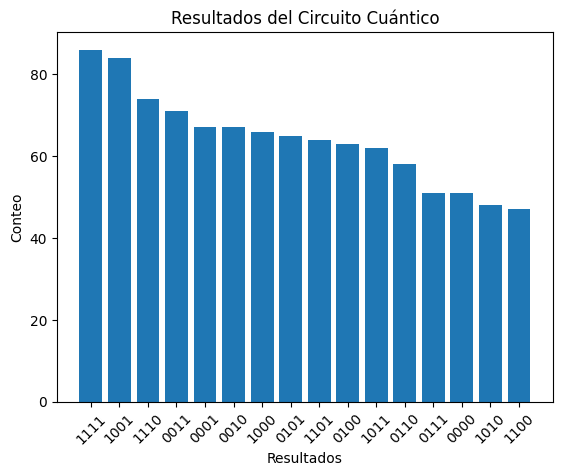

In [ ]:
# Simulacion de  mayor a menor segun counts
import matplotlib.pyplot as plt
import numpy as np

# Obtener el simulador
simulator = Aer.get_backend('qasm_simulator')


# Ejecutar el circuito
result = simulator.run(transpiled_circuit, shots=1024, noise_model=noise_model).result()

# Obtener y mostrar resultados
counts = result.get_counts()
print("Counts:", counts)

# Ordenar los resultados por conteo
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))

# Extraer las claves y los valores
results = list(sorted_counts.keys())
values = list(sorted_counts.values())

# Crear un nuevo eje para centrar los resultados
x_positions = np.arange(len(results))

# Graficar
plt.bar(x_positions, values)
plt.xlabel('Resultados')
plt.ylabel('Conteo')
plt.title('Resultados del Circuito Cuántico')

# Ajustar las etiquetas del eje x
plt.xticks(ticks=x_positions, labels=results, rotation=45)
plt.show()


In [ ]:
# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService, Options
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Replace 'YOUR_IBM_TOKEN' with your actual IBM Quantum token
token = '85ec3b5dccf9b8961bfe2cc9a9f7ff151b695b046919f187bde3be176fce1f13a391d81e1ae8ba4a1a93d8feba13ea41a8491bad56e38e1273bb8fd486b72a79'
QiskitRuntimeService.save_account(channel="ibm_quantum", token=token, overwrite=True)

# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)
backend.name


pm = generate_preset_pass_manager(target=backend.target, optimization_level=3)
isa_circuit = pm.run(qc)

# Define Sampler
sampler = Sampler(mode=backend)

# Run calculation
job = sampler.run([isa_circuit], shots=2024)





ModuleNotFoundError: No module named 'qiskit_ibm_runtime'

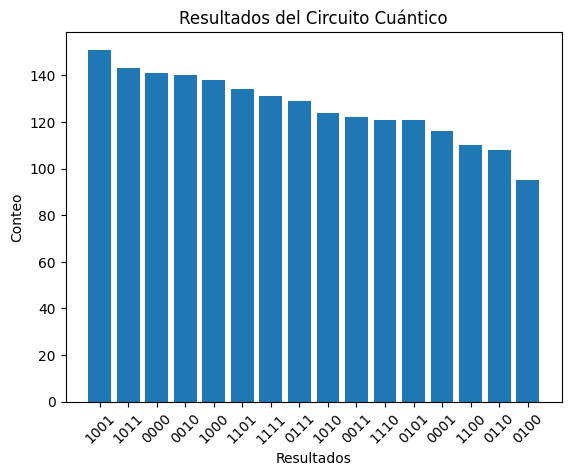

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
import matplotlib.pyplot as plt
import numpy as np

# Inicializar el servicio
service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='85ec3b5dccf9b8961bfe2cc9a9f7ff151b695b046919f187bde3be176fce1f13a391d81e1ae8ba4a1a93d8feba13ea41a8491bad56e38e1273bb8fd486b72a79'
)

# Obtener los resultados del trabajo
job = service.job('cwjn4e99r49g00896w1g')
job_result = job.result()  # Obtener el resultado del trabajo

# Acceder a los conteos del primer resultado publicado
pub_result = job_result[0]  # índice del primer resultado
classical_register_name = qc.cregs[0].name  # Asumiendo que hay al menos un registro clásico

# Obtener los conteos
counts = pub_result.data[classical_register_name].get_counts()

# Ordenar los resultados por conteo
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))

# Extraer las claves y los valores
results = list(sorted_counts.keys())
values = list(sorted_counts.values())

# Crear un nuevo eje para centrar los resultados
x_positions = np.arange(len(results))

# Graficar
plt.bar(x_positions, values)
plt.xlabel('Resultados')
plt.ylabel('Conteo')
plt.title('Resultados del Circuito Cuántico')
plt.xticks(ticks=x_positions, labels=results, rotation=45)
plt.show()